# Route Optimisation Project

* GUG Maxime
* AYOUB Simon
* KISA Yasin
* GALLERNE Jules


## Table of content

* I. [Formal modelling](#1-formal-modelling) 
* II.  [Algorithmic design and implementation](#2-algorithmic-design-and-implementation)
* III. [Experimental study](#3-experimental-study)
* IV. [Presentation of the work done to your team (in English) before submitting the deliverables to ADEME](#4-presentation-of-the-work-done-to-your-team-in-english-before-submitting-the-deliverables-to-ademe)

## I. Formal modelling 

### 1. Presentation of the context

In the context of climate change, ADEME has launched a call for proposals focused on innovative and sustainable mobility solutions for both people and goods. The agency aims to foster experimental projects that demonstrate efficient, sustainable methods for transportation, adapted to different kind of territories and fields. This way, they aim to combat climate change by optimizing existing technologies.

As part of CesiCDP, a team with a strong background in Smart Multimodal Mobility, we are a good fit to respond to this call. With our experience developing advanced transportation systems, we recognize both the potential and the challenges of new transport technologies. Although these technologies promise to be cleaner and more economical, they bring their own logistical complexities, especially in resource management. Addressing these issues in transport logistics could be transformative, not only for the industry but for the environment as well-through applications in diverse areas such as mail distribution, product delivery, road network maintenance, waste collection and much more.

The objective of this project is to optimize delivery routes to minimize environmental impact while increasing efficiency. Our team’s goal is to propose an algorithmic solution that computes optimal delivery routes across a road network, linking various cities and returning to the origin point. The solution will minimize the total journey time while accounting for projected traffic conditions over various time slots and perhaps trucks capacity.

### 2. Presentation of the problem

Our Problem is a typical Vehicle routing problem. The Vehicule routing is a classical problem in the field of Transportation. Our goal is to go through each given cities (delivery points) and to return to the starting point in the smallest amount of time possible.
We could also take into consideration the opening hours of the clients as well as the capacity of the trucks (either in terms of surface or volume)

#### Parameters to take as input

We will use solomon's instances as input for our algorithm.
Solomon instances are a set of instances that are used to test algorithms for the travelling salesman problem. They are available in the form of a txt file. 
You can find them here : https://www.sintef.no/projectweb/top/vrptw/solomon-benchmark/
In our github, they are available in the folder "solomon_instances"

list of:
* Customer
	* customer number
	* customer coordinates
	* delivery time slot 

* Available trucks 
    * Truck Capacity


#### Result to return

* The shortest path to go to each cities.
    * path for each truck (if truck multiple trucks)
* Total time for the round trip

with:
    * Time at each destination (optional)
    * Items in each truck (if item list)

### Formal modelling

**Variables:**
* $N$: Set of clients 
* $S$: Subset of the set of clients
* $D$: Deposit location 
* $K$: Number of vehicles
* $Q$: Maximum capacity of each 
* $R$: Set of routes
* $W$: Maximum weight capacity of vehicle $k$
* $V$: Maximum volume capacity of vehicle $k$
* $c_i$: size of the goods for client $i$.
* $y_k$: Binary variable, where the vehicle $k$ is active or not.
* $[e_i,l_i]$:Time window for customer $i$, where $e_i$ is the earliest arrival and $l_i$ is the latest.
* $t_{ij}$: Travel time from node $i$ to node $j$.
* $a_i​$: Arrival time at customer $i$ on a route.
* $d_i​$: Demand of customer $i$.
* $x^k_{ij}​$: Binary variable, where: * 
	* $x^k_{ij}=1$: if vehicle $k$ travels from node iii to node $j$,
	* $x_{ij}^k = 0$: otherwise. 
* $\alpha, \beta, \gamma$: Weights for the objectives functions.

**Objectives functions:**

$$\min (\alpha\times\sum_{k \in K}y_{k\ }+\beta\times\sum_{i \in N \cup D}{\sum_{j \epsilon N \cup D}x_{ij}^kt_{ij}}+\gamma\times\sum_{k \in K}1\left(\sum_{i \in N \cup D}\sum_{j \epsilon N \cup D}x_{ij}^k\le3\right))$$ 

**Constraints:**

1. **Vehicle capacity constraint:**

Purpose: This constraint ensures that no vehicle exceeds its maximum carrying capacity, C.

Explanation: Since each truck has a physical limit on how much it can carry, we must ensure that the sum of demands for customers assigned to a single route does not surpass this limit. For any solution where this constraint is violated, it would imply a truck is overloaded, which would be infeasible in real-world scenarios. By enforcing this, we ensure that each truck stays within its capacity, allowing each route to be completed practically and within regulatory size and weight limits.


$$ \sum_{i \in N} c_i \sum_{j \in N u D} x^k_{ij} \leq Q$$

2. **Service Time Window Constraint**

Each vehicle must arrive at each customer within the specified time window 

$$a_j  ≥ a_i + s_i+ t_{ij} - H .(1-x_{ij}^k)   \forall i,j\in N\cup D,\ \forall\ k\in K\$$

Explanation: This ensures that if a route exists between i and j the time at which the vehicle arrives at j accounts for:
1.	The time the vehicle arrived at i.
2.	The travel time between i and j.
Without this constraint, the sequence of visits and the corresponding travel times would not be respected.H is a "big-M" constant used to disable the timing constraint when no route exists between i and j. It must be large enough to make the constraint irrelevant in this case but not so large that it causes numerical instability.


**3. Return to Depot Constraint**

$$\sum_{j\in N}x_{Dj}^k\  =\ \sum_{i\in N}x_{iD}^k\ = y_k  , \forall k\in k$$ 

Ensures that if a vehicle k is active, ($y_k=1$) it must both:
1.	Start its route by leaving the depot ($x_Dj^k$  ​).
2.	End its route by returning to the depot ($x_iD^k$​).

Explanation: In the context of delivery routes, it’s standard for vehicles to depart from a central location (depot) and return there after completing their deliveries. The first constraint, $\sum_{j∈N}x_{Dj}^k $ 
 requires that each route starts at the depot, while the second constraint, $\sum_{i∈N}x_{iD}^k $
 enforces that each route ends at the depot. Together, they ensure that every route forms a complete loop, which is a fundamental part of route-based logistics.

4. **Single Visit per Customer Constraint**

Each customer must be visited exactly once by one vehicle:
$$\sum_{j∈k} \sum_{j∈N∪D} x_{ij}^k=1    ,∀i∈N $$
Explanation: This constraint prevents situations where a customer might be visited multiple times or missed entirely. For any feasible solution, each customer must be served by one and only one vehicle. By enforcing that, we guarantee that each customer i (excluding the depot) is included exactly once in the route plan, maintaining route efficiency and avoiding unnecessary repetitions.

5. **Subtour elimination** 

$$\sum_{k∈k} \sum_{n∈N(s)} x_n^k≤|S|-1∀S⊂V, S≠∅ S$$

*  What Is a Subtour?
    *	Imagine you have a VRP where clients $A$, $B$, and $C$ are visited by a vehicle, but the vehicle neither connects to the depot nor visits the rest of the network. This forms a "subtour."
    *	Subtours are infeasible because all clients need to be part of a single connected route that starts and ends at the depot.
*  Eliminating Subtours:
	* This constraint limits the number of edges (or arcs) within any subset $S$ of nodes to be less than $∣S∣−1$. This ensures that no subset of nodes can form a closed loop disconnected from the depot or the rest of the network.



### 3. Theoratical properties that we'll use and their formalisation 

We want to prove that our problem is NP-Complete.
To do that, we need to demonstrate 2 things:
* That our problem $\in$ NP, that means that we can verify a solution in a polynomial time.
* That our problem is at least as hard as another NP-Complete problem (here the Traveling salesman Problem, and then the Hamiltonian cycle). We do that by making a polynomial reduction

#### Our problem $\in$ NP

To show that the VRP problem is np, we need to demonstrate that a solution can be verified in a polynomial time.

We define our VRP Instance like:

* A set of $N$ client and our starting point (deposit) $D$
* A fleet of $K$ Vehicle, with a maximal capacity $Q$ for each truck.
* A Cost Matrix $T=(t_{ij})$ for $i,j \in \{ D,1,2,…,N \}$, representing the time of the travel between each pair of client / each pair of client and the deposit.

A candidate solution for our problem is a set of route $R_1, R_2, ... , R_k$ for the $K$ available vehicles. Each route $R_k$ should:

* Start from our deposit $D$
* Respect the capacity $Q$ of the vehicle
The $N$ Client should have been visited once

To verify that a candidate solution is valide, we can compute the following opération in a polynomial time:
1. Verifying that each route $R$ starts from $D$
2. Verifying that each client is visited once and only once
3. Verifying that the capacity $Q$ of each vehicule is not exceeded
4. Calculating the total cost of the routes and verifying that the constraint of cost are respected (if they are defined)
5. Verifying that the vehicules deliver during the time slot of each city (if time slots are defined). \
...

As we can see, we can verify a candidate solution of our problem in a polynomial time. Therefore, **our VRP problem is a NP problem**

#### Our problem NP-Hard

We first started by trying to reduce our problem to the Travelling Salesman Problem to then reduce it to the Hamiltonian cycle. But we quickly realised that we could directly reduce our problem to the Hamiltonian cycle.
Therefore, the reduction to the Travelling Salesman Problem is not necessary but we will still present it.

In order to show that our problem is NP-HARD, we have to make a polynomial reduction from VRP to the *Travelling Salesman Problem*.
As defined earlier, in the VRP, We have $K$ vehicle available with a capacity of $Q$, and we want to have a $K$ routes that goes to all the given cities. The routes must start and finish at the Deposit.
In the Travelling Salesman Problem, we have one vehicule, we want to go to each given city and we must start and finish at the same point.
So, to reduct our problem to the TSP, we have to say that $K=1$, that we don't care about the capacity because we have 1 salesman to transport. 
Now that $K=1$, we calculate one path that visits each city exactly once, starting and finishing at one starting point. As you can see, that is the TSP.
All the operations we did for the reduction can be computed in a polynomial time, in other words, we can reduce our VRP problem to a TSP problem in a polynomial time. We know that the TSP problem is NP-HARD, so we can say that **our problem is NP-HARD**

##### Reduction from VRPTW to Hamiltonian Cycle (to prove that VRPTW is at least NP-Complete)
The Hamiltonian Cycle problem determins whether a graph contains a cycle that visits each vertex exactly once. 
In our case, the VRPTW problem uses a graph and a max time as an input and returns whether it is possible to visit all the nodes in the graph in the given time.
We will reduce the VRPTW problem to the Hamiltonian cycle problem.

<ins>Conditions:</ins>

1. The first step is to create a graph that would work for any instance of the Hamiltonian Cycle.
Therefore, we need to create a graph where Each vertex in the Hamiltonian graph corresponds to a customer's location (in our case, a city).
Then, we add a node for the depot (which is both the start and end point of the route).
We then set all the distances in the VRPTW problem as the distances between the nodes in the Hamiltonian graph.
2. The second step is to limit the number of vehicles to 1 and to set the capacity of the truck so that it is at least equal to the sum of the demands of all the customers. This way, a single truck can ensure all the deliveries, making sure that one truck can visit all the nodes.
3. The third step is to set the time windows of the customers. We will set the time windows of the all the customers to be the same one so that the truck can visit all the customers in any order.

<ins>Definition:</ins>

VRPTW problem : Given a graph $G = (V, E)$ where $V$ includes a warehouse and customer locations along with the following informations:
* A distance $d(i, j)$ between each pair of vertices $i, j \in V$.
* A time window $[a_i, b_i]$ for each customer $i \in V$.
* Vehicle capacity $Q$.
* a maximum route time $T$ to visit all the customers. (serves as a time limit for the Hamiltonian Cycle problem)

Hamiltonian Cycle problem : Given a graph $G'= (V', E')$, determine whether there is a cycle in $V'$ that visits each vertex exactly once.

<ins>Transformation:</ins>

To transform an instance of VRPTW into an instance of HC, we need to create a graph $G'$ such that solving HC on $G'$ corresponds to solving VRPTW on $G$.

Steps :

1. Each customer i in the VRPTW instance corresponds to a vertex $v_i$ in $G'$. We add a vertex $v_0$ to represent the warehouse.
2. For every pair of vertices $v_i$ and $v_j$ in $G'$, we include an edge with weight $d(i, j)$. The distance between two locations in the VRPTW instance is the weight of the edge between the corresponding vertices in $G'$.
3. We set the number of vehicles to 1 and the capacity of the truck to be at least equal to the sum of the demands of all the customers. This ensures that a single truck can visit all the customers. The mathematical representation of this would be $Q \geq \sum_{i \in V} demand(i)$.
4. We set the time windows of all the customers to be the same. This way, the truck can visit all the customers in any order. The time limit for the Hamiltonian Cycle problem is set to the maximum route time $T$ in the VRPTW instance.
5. If the graph is not complete by default, we have to create new edges whose weights will be the sum of the weights of the shortest path between the two vertices in the original graph. That way, we can make sure that the graph is complete.

If we can find a Hamiltonian Cycle in $G'$, then we can find a solution to the VRPTW problem. Therefore, the VRPTW problem is at least as hard as the Hamiltonian Cycle problem, which is NP-Complete. Therefore, the VRPTW problem is at least NP-Complete.

<ins>Polynomial Time check:</ins>

The vertices from $G'$ are directly created from $V$ in $O(|V|)$ time.
Furthermore, the edges and weights of G' are derived from E, requiring $O(|E|)$ time.
Setting the number of vehicles to 1 and the capacity of the truck to be at least equal to the sum of the demands of all the customers can be done in $O(1)$ time.

Therefore, the transformation from $G$ to $G'$ can be done in O(|V| + |E|) time, which is polynomial time.

<ins>Conclusion</ins>

Using these results, we can say that the VRPTW problem is NP-Complete as it can be reduced to the Hamiltonian Cycle problem in polynomial time.


### 4. References
Hamiltonian Cycle (Proof of NP-Completeness) : https://en.wikipedia.org/wiki/Hamiltonian_path \
TSP (Proof of NP-Completeness) : https://en.wikipedia.org/wiki/Travelling_salesman_problem




## II. Algorithmic design and implementation

### Best approch to solve our problem

#### 1. Exact Algorithm

Common Exact algorithms:

* ***Branch-and-Bound** and **Branch-and-Cut:** These are common techniques in solving integer programming problems. They work well on small to moderately-sized VRPTW instances by exploring feasible routes and pruning the search tree when constraints aren’t met.

- **Dynamic Programming (DP):** Can be used to handle the time windows and sequencing constraints by breaking the problem into subproblems. However, DP suffers from exponential growth in complexity and is usually feasible only for smaller instances.

* ***Mixed-Integer Linear Programming (MILP):** Formulating the VRPTW as an MILP is possible and can be solved with solvers like Gurobi or CPLEX. MILP approaches are exact but can be computationally expensive.

Exact Algorithm are not the most optimal way to solve the problem, they have high computational costs, so we can just use them for small to moderately sized instances (usually fewer than 100 cities)

#### 2. **Heuristic Methods**


Common Heuristic algorithms:

- **Savings Algorithm:** Clarke-Wright Savings heuristic can be adapted to VRPTW by incorporating time window constraints in route merging.

- **Insertion Heuristics:** These build routes by sequentially inserting customers, checking feasibility with time windows, and selecting the least-cost option.

- **Sweep Algorithm:** This heuristic sorts customers based on angles from the depot and constructs routes. It’s often combined with local search for refinement.

- **Local Search Techniques:** Common local search methods include **2-opt** and **3-opt**, where edges are rearranged for better routes. For VRPTW, additional constraints are added to respect time windows during swaps or reordering.

Heuristic methods are efficient and useful for obtaining feasible, high-quality solutions quickly, especially for larger problems. Heuristics are techniques that generate good solutions quickly, though they don’t guarantee optimality.

#### 3. **Metaheuristic Algorithms**

Common Metaheuristic algorithms:
- **Simulated Annealing (SA):** SA gradually reduces the "temperature" to accept fewer worsening solutions, with adjustments for VRPTW to handle infeasibilities in time windows and vehicle limits.

- **Genetic Algorithms (GA):** These use crossover, mutation, and selection operators to evolve a population of routes over generations, incorporating time window feasibility in offspring generation.

- **Ant Colony Optimization (ACO):** ACO mimics the behavior of ants finding the shortest path and is adapted to VRPTW by modifying pheromone updates based on time window constraints.

- **Tabu Search:** This maintains a tabu list of recently explored solutions to avoid cycling and enhances exploration by allowing temporary infeasible solutions for time windows, gradually moving towards feasible solutions.

Metaheuristics provide a more structured approach than heuristics and can escape local optima, exploring the solution space more thoroughly. Metaheuristics balance solution quality and computational cost and can handle larger instances, making them popular for practical applications.

#### 4. **Hybrid Approaches**

Combining methods often leads to better results than any single method alone. Common hybrid approaches include:

- **Metaheuristic + Local Search:** Many metaheuristics, such as genetic algorithms or simulated annealing, are combined with local search methods like 2-opt or 3-opt to improve the quality of solutions.

- **Exact Methods + Heuristics:** Sometimes, heuristics generate initial solutions that are later refined with exact methods. This is beneficial when an exact solution is infeasible to achieve from scratch.

- **Decomposition Approaches:** These divide the VRPTW into smaller subproblems (e.g., by clustering nodes) and solve each part individually, often using heuristics for initial subproblems and exact methods for refinement.

| Small instances(10-50 cities) | medium instances (50-200)  | Large instances (>200)              |
| ----------------------------- | -------------------------- | ----------------------------------- |
| Exact Algo                    | Heuristic or Metaheuristic | Metaheuristics or hybrid approaches |

#### Application to our project

It is said that our model needs to be "Capable of solving large instances (several thousand cities)"
So the better approach would be Metaheuristic approach


## III. Experimental study

Iteration 1: Temperature 9950.0000, Best Cost 2887.955814539028, Active Trucks: 21
Iteration 3: Temperature 9850.7488, Best Cost 2885.0454657368596, Active Trucks: 21
Iteration 4: Temperature 9801.4950, Best Cost 2848.779781871945, Active Trucks: 21
Iteration 5: Temperature 9752.4875, Best Cost 2825.0047656808374, Active Trucks: 21
Iteration 7: Temperature 9655.2065, Best Cost 2791.2938262807247, Active Trucks: 21
Iteration 8: Temperature 9606.9304, Best Cost 2778.5508597597645, Active Trucks: 21
Iteration 9: Temperature 9558.8958, Best Cost 2773.669040085632, Active Trucks: 20
Iteration 12: Temperature 9416.2281, Best Cost 2767.85243294607, Active Trucks: 20
Iteration 13: Temperature 9369.1469, Best Cost 2766.8001229142965, Active Trucks: 20
Iteration 15: Temperature 9275.6897, Best Cost 2753.283296129727, Active Trucks: 20
Iteration 16: Temperature 9229.3112, Best Cost 2741.6474117861753, Active Trucks: 20
Iteration 18: Temperature 9137.2489, Best Cost 2718.607789309777, Active Truck

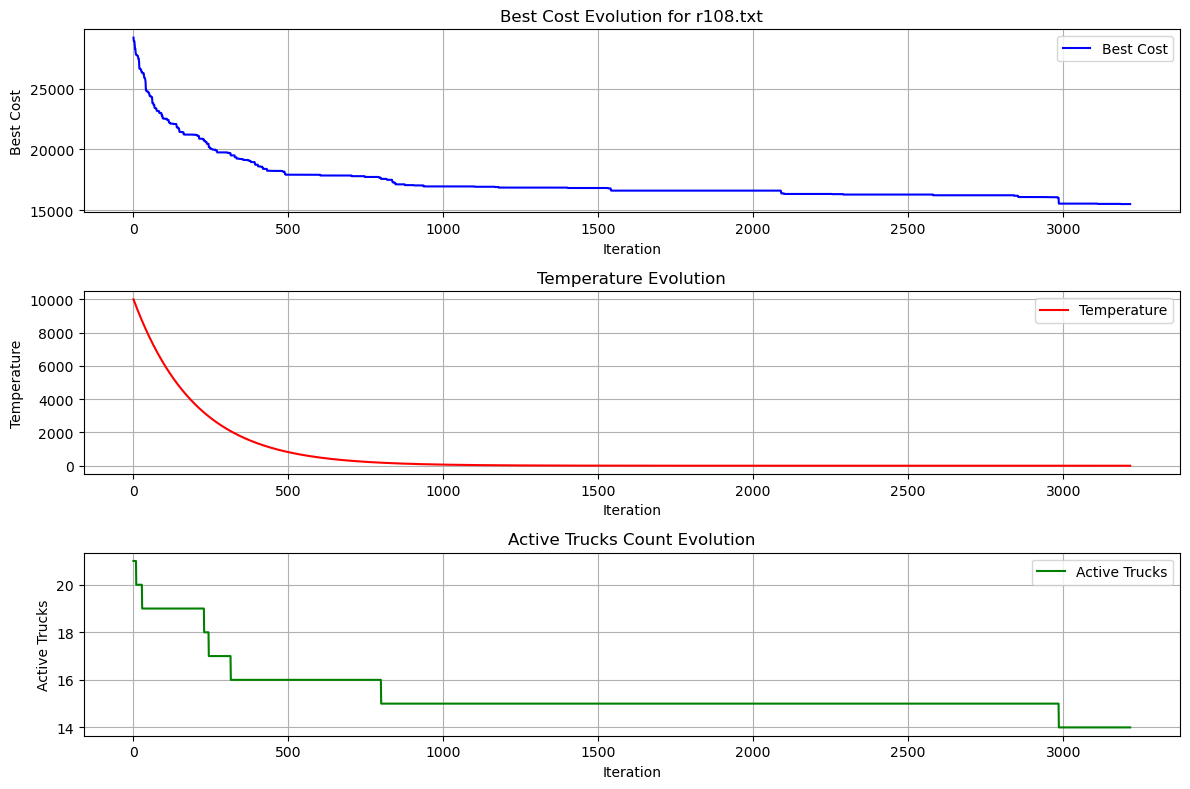

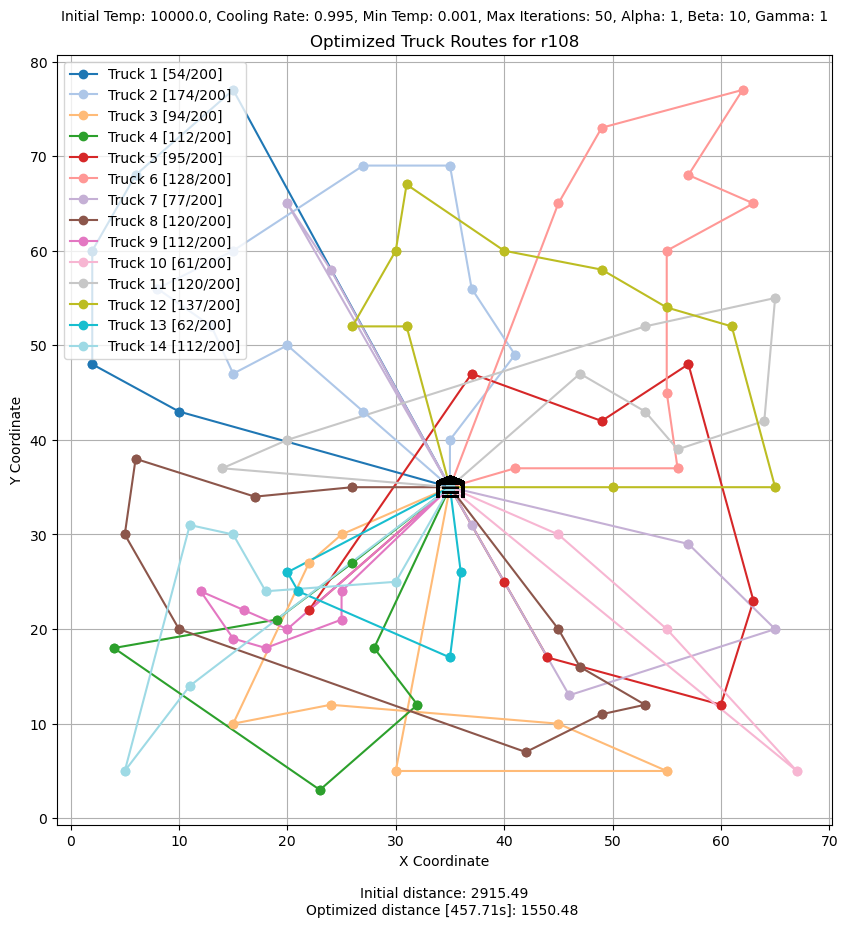

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt, exp
import os
from functools import lru_cache
import time
import concurrent.futures

pwd = !pwd
projectRoot = os.path.abspath(os.path.join(pwd[0], ".."))  # Compatibility fix

# Customer class
class Customer:
    def __init__(self, id: int, x: int, y: int, demand: int, ready_time: int, due_date: int, service_time: int):
        """
        Initialize a Customer object with the given attributes for the VRPTW problem.
        :param id: int unique identifier for the customer
        :param x: int x-coordinate of the customer location
        :param y: int y-coordinate of the customer location
        :param demand: int demand of the customer
        :param ready_time: int earliest time the customer can be served
        :param due_date: int latest time the customer can be served
        :param service_time: int time it takes to serve the customer
        """
        self.id = id
        self.x = x
        self.y = y
        self.demand = demand
        self.ready_time = ready_time
        self.due_date = due_date
        self.service_time = service_time

# Truck class
class Truck:
    def __init__(self, id: int, capacity: int, start_location: int):
        """
        Initialize a Truck object with the given attributes for the VRPTW problem.
        :param id: int truck unique identifier
        :param capacity: int truck capacity
        :param start_location: int starting location of the truck (ID of customer 0 -> depot)
        """
        self.id = id
        self.capacity = capacity
        self.route = [start_location]
        self.remaining_capacity = capacity
        self.current_time = 0
        self.total_distance = 0

    def calculate_route_distance(self, customers: list[Customer]):
        """
        Calculate the total distance of the route for the truck
        :param customers: list of Customer objects
        :return: int total distance of the route for the truck
        """
        distance = 0
        for i in range(len(self.route) - 1):
            distance += calculate_distance(customers[self.route[i]], customers[self.route[i + 1]])
        return distance

    def can_visit(self, customer: Customer, current_location: Customer):
        """
        Check if the truck can visit the customer within time and capacity constraints.
        :param customer: The customer to visit next.
        :param current_location: The truck's current location.
        :return: True if visit is feasible, otherwise False.
        """
        arrival_time = self.calculate_arrival_time(current_location, customer)

        # Check capacity constraint
        if self.remaining_capacity < customer.demand:
            return False

        # Check time window constraint
        if arrival_time > customer.due_date:
            return False

        return True

    def visit(self, customer: Customer, current_location: Customer):
        """
        Update the truck's state after visiting a customer.
        :param customer: The customer being visited.
        :param current_location: The truck's current location.
        """
        travel_time = calculate_distance(current_location, customer)
        arrival_time = self.current_time + travel_time
        # Wait if arriving early
        self.current_time = max(arrival_time, customer.ready_time) + customer.service_time
        self.remaining_capacity -= customer.demand
        self.total_distance += travel_time

    def calculate_arrival_time(self, current_location: Customer, customer: Customer):
        """
        Calculates the estimated arrival time at a customer location.
        :param current_location: The current location of the truck (Customer object).
        :param customer: The customer to visit next (Customer object).
        :return: int estimated arrival time at the customer location.
        """
        travel_time = calculate_distance(current_location, customer)
        return self.current_time + travel_time


@lru_cache(maxsize=None)  # Caches results to avoid redundant calculations
def calculate_distance(c1: Customer, c2: Customer):
    """
    Calculate the Euclidean distance between two customers
    :param c1: customer 1 object
    :param c2: customer 2 object
    :return: float Euclidean distance between the two customers
    """
    return sqrt((c1.x - c2.x) ** 2 + (c1.y - c2.y) ** 2)


# Solution Class
class VRPTWSolution:
    def __init__(self, customers: list[Customer], truck_capacity: int, max_trucks: int, depot: Customer, temperature: float,
                 initial_temperature: float):
        """
        Initialize a VRPTWSolution object with the given attributes for the VRPTW problem.
        :param customers: list[Customer] list of Customer objects
        :param truck_capacity: int capacity of the trucks
        :param max_trucks: int maximum number of trucks that can be used
        :param depot: Customer object representing the depot location (customer 0)
        :param temperature: Current temperature of the SA.
        :param initial_temperature: Initial temperature of the SA.
        """
        self.customers = customers
        self.truck_capacity = truck_capacity
        self.max_trucks = max_trucks
        self.depot = depot
        self.temperature = temperature
        self.initial_temperature = initial_temperature
        self.routes = self.generate_initial_solution()

    def calculate_remove_truck_weight(self, temperature, initial_temperature):
        """
        Calculate the weight for the 'remove_truck' strategy based on the current temperature.
        :param temperature: Current temperature of the SA.
        :param initial_temperature: Initial temperature of the SA.
        :return: Weight for the 'remove_truck' strategy.
        """
        return 5 * (temperature / initial_temperature)


    def generate_initial_solution(self):
        """
        Generate an initial solution by respecting constraints on capacity and time windows.
        """
        unvisited = set(self.customers[1:])  # Exclude the depot
        trucks = []

        for truck_id in range(self.max_trucks):
            truck = Truck(truck_id, self.truck_capacity, self.depot.id)
            while unvisited:
                current_location = self.customers[truck.route[-1]]
                feasible_customers = [
                    customer for customer in unvisited if truck.can_visit(customer, current_location)
                ]
                if not feasible_customers:
                    break

                # Prioritize harder-to-visit customers (e.g., close due date, higher demand)
                feasible_customers.sort(key=lambda c: (c.due_date, -c.demand))
                best_customer = feasible_customers[0]

                truck.visit(best_customer, current_location)
                truck.route.append(best_customer.id)
                unvisited.remove(best_customer)

            if len(truck.route) > 1:
                truck.route.append(self.depot.id)  # Return to depot
                trucks.append(truck)
            if not unvisited:
                break  # All customers assigned

        return trucks

    def validate_routes(self, routes):
        """
        Ensure all routes start and end with the depot and contain no duplicate depots.
        """
        depot_id = self.depot.id
        for truck in routes:
            # Ensure depot at start and end
            if truck.route[0] != depot_id:
                truck.route.insert(0, depot_id)
            if truck.route[-1] != depot_id:
                truck.route.append(depot_id)
            # Remove duplicate depots
            truck.route = [depot_id] + [c for c in truck.route[1:-1] if c != depot_id] + [depot_id]
        return routes

    def neighbor_solution(self):
        """
        Generates a neighbor solution with strategies for adjusting truck numbers or balancing routes.
        Ensures all generated routes are feasible and improves solution diversity.
        """
        new_routes = [Truck(t.id, t.capacity, t.route[0]) for t in self.routes]
        for i, truck in enumerate(self.routes):
            new_routes[i].route = truck.route[:]
            new_routes[i].remaining_capacity = truck.remaining_capacity

            # Choose a strategy for neighbor generation
        remove_truck_weight = self.calculate_remove_truck_weight(self.temperature, self.initial_temperature)
        strategy = random.choices(
            ["merge_routes", "move_customer", "swap_between_routes", "reorder_within_route", "add_truck",
             "remove_truck"],
            weights=[1, 1, 1, 1, 1, remove_truck_weight],
            k=1
            )[0]
        depot_id = self.depot.id

        if strategy == "merge_routes" and len(new_routes) > 1:
            # Merge two routes
            truck1, truck2 = random.sample(new_routes, 2)
            combined_route = truck1.route[:-1] + truck2.route[1:-1]  # Merge routes, excluding depots

            # Check feasibility
            if self.is_feasible_route(combined_route):
                truck1.route = combined_route + [depot_id]
                truck2.route = [depot_id]  # Empty truck2
                truck2.remaining_capacity = truck2.capacity

        elif strategy == "move_customer" and len(new_routes) > 1:
            # Move a customer from one route to another
            truck1, truck2 = random.sample(new_routes, 2)
            if len(truck1.route) > 2:  # Ensure truck1 has customers to move
                customer = random.choice(truck1.route[1:-1])  # Exclude depot
                truck1.route.remove(customer)
                truck2.route.insert(-1, customer)  # Add to truck2

                # Validate both routes
                if not (self.is_feasible_route(truck1.route) and self.is_feasible_route(truck2.route)):
                    # Revert changes if invalid
                    truck2.route.remove(customer)
                    truck1.route.insert(-1, customer)

        elif strategy == "swap_between_routes" and len(new_routes) > 1:
            # Swap customers between routes
            truck1, truck2 = random.sample(new_routes, 2)
            if len(truck1.route) > 2 and len(truck2.route) > 2:  # Ensure both have customers
                customer1 = random.choice(truck1.route[1:-1])  # Exclude depots
                customer2 = random.choice(truck2.route[1:-1])

                # Temporarily swap customers
                truck1.route.remove(customer1)
                truck2.route.remove(customer2)
                truck1.route.insert(-1, customer2)
                truck2.route.insert(-1, customer1)

                # Validate both routes
                if not (self.is_feasible_route(truck1.route) and self.is_feasible_route(truck2.route)):
                    # Revert changes if invalid
                    truck1.route.remove(customer2)
                    truck2.route.remove(customer1)
                    truck1.route.insert(-1, customer1)
                    truck2.route.insert(-1, customer2)

        elif strategy == "reorder_within_route":
            # Reorder customers within a single route (2-opt)
            truck = random.choice(new_routes)
            if len(truck.route) > 3:  # At least 3 nodes for meaningful reordering
                i, j = sorted(random.sample(range(1, len(truck.route) - 1), 2))  # Exclude depots
                new_route = truck.route[:i] + truck.route[i:j + 1][::-1] + truck.route[j + 1:]

                # Validate the reordered route
                if self.is_feasible_route(new_route):
                    truck.route = new_route

        elif strategy == "add_truck" and len(new_routes) < self.max_trucks:
            # Add a new truck by splitting an existing route
            new_truck = Truck(len(new_routes), self.truck_capacity, depot_id)
            # Attempt to split the longest route
            longest_route = max(new_routes, key=lambda t: t.calculate_route_distance(self.customers))
            if len(longest_route.route) > 3:  # At least 2 deliveries to split
                split_point = len(longest_route.route) // 2
                new_truck.route = [depot_id] + longest_route.route[split_point:] + [depot_id]
                longest_route.route = longest_route.route[:split_point] + [depot_id]

                # Validate routes after split
                if self.is_feasible_route(new_truck.route) and self.is_feasible_route(longest_route.route):
                    new_routes.append(new_truck)
                else:
                    # Revert split if invalid
                    longest_route.route += new_truck.route[1:-1]  # Exclude depot from revert
                    new_truck.route = [depot_id]

        elif strategy == "remove_truck" and len(new_routes) > 1:
            # Remove a random truck and redistribute its customers
            truck_to_remove = random.choice([t for t in new_routes if len(t.route) > 2])  # Exclude empty trucks
            removed_customers = truck_to_remove.route[1:-1]  # Exclude depots
            new_routes.remove(truck_to_remove)

            # Redistribute customers to other trucks
            for customer_id in removed_customers:
                customer = self.customers[customer_id]
                for truck in new_routes:
                    if truck.can_visit(customer, self.customers[truck.route[-1]]):
                        truck.route.insert(-1, customer_id)
                        break
                else:
                    # Revert if redistribution fails
                    new_routes.append(truck_to_remove)
                    break

        # Ensure all routes are feasible before returning
        for truck in new_routes:
            if not self.is_feasible_route(truck.route):
                return self.routes  # Return current solution if invalid neighbor is generated

        return self.validate_routes(new_routes)

    def is_feasible_route(self, route):
        """
        Check if a route is feasible with respect to time windows and capacity constraints.
        """
        current_capacity = 0
        current_time = 0
        current_customer = self.depot

        for customer_id in route[1:]:  # Skip the depot
            customer = self.customers[customer_id]
            current_capacity += customer.demand
            travel_time = calculate_distance(current_customer, customer)
            arrival_time = current_time + travel_time

            if current_capacity > self.truck_capacity or arrival_time > customer.due_date:
                return False

            current_time = max(arrival_time, customer.ready_time) + customer.service_time
            current_customer = customer

        return True

    def calculate_cost(self, alpha=100, beta=1000, gamma=100):  # Factors might need a little fine tuning
        """
        Calculate the cost of the solution with weights on minimizing trucks, distance, and underutilized trucks.
        :param alpha: INT weight for the number of trucks.
        :param beta: INT weight for the total distance.
        :param gamma: INT weight for underutilized trucks.
        :return: INT cost of the solution.
        """
        num_trucks = len([truck for truck in self.routes if len(truck.route) > 2])  # Exclude empty trucks
        total_distance = sum(truck.calculate_route_distance(self.customers) for truck in self.routes)

        # Penalize underutilized trucks
        underutilized_trucks = sum(1 for truck in self.routes if len(truck.route) <= 3)  # Depot + 1 or 2 customers
        underutilization_penalty = gamma * underutilized_trucks

        return alpha * num_trucks + beta * total_distance + underutilization_penalty

    def calculate_distance(self):
        return sum(truck.calculate_route_distance(self.customers) for truck in self.routes)

# Simulated Annealing
class SimulatedAnnealing:
    def __init__(self, initial_solution: VRPTWSolution, initial_temperature=1000.0, cooling_rate=0.995, min_temperature=1e-3):
        """
        Initialize the Simulated Annealing algorithm.
        """
        self.current_solution = initial_solution
        self.best_solution = initial_solution
        self.temperature = initial_temperature
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.min_temperature = min_temperature
        self.plot_data = None

    def accept_probability(self, delta, temperature):
        """
        Calculate the probability of accepting a worse solution.
        """
        if delta < 0:
            return 1
        return exp(-delta / temperature)

    def generate_and_evaluate_neighbor(self, alpha: int, beta: int, gamma: int):
        """
        Generate a neighbor solution and evaluate its cost.
        :param current_cost: INT Current solution cost.
        :return: (VRPTWSolution, cost)
        """
        neighbor_routes = self.current_solution.neighbor_solution()
        new_solution = VRPTWSolution(
            self.current_solution.customers,
            self.current_solution.truck_capacity,
            self.current_solution.max_trucks,
            self.current_solution.depot,
            self.temperature,
            self.initial_temperature
        )
        new_solution.routes = neighbor_routes
        new_cost = new_solution.calculate_cost(alpha, beta, gamma)
        return new_solution, new_cost

    def optimize(self, max_iterations=1000, num_workers=16, alpha=100, beta=1000, gamma=100):
        """
        Optimize the VRPTW problem using Simulated Annealing with parallel neighbor evaluation.
        :param max_iterations: INT Maximum iterations per temperature level.
        :param num_workers: INT Number of parallel workers.
        """
        iteration = 0

        # Data for plotting
        temperatures = []
        best_costs = []
        active_trucks_counts = []

        while self.temperature > self.min_temperature:
            neighbors = []
            costs = []
            current_cost = self.current_solution.calculate_cost()

            with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
                # Generate neighbors in parallel
                futures = [executor.submit(self.generate_and_evaluate_neighbor, alpha, beta, gamma) for _ in
                           range(max_iterations)]
                for future in concurrent.futures.as_completed(futures):
                    neighbor, cost = future.result()
                    neighbors.append(neighbor)
                    costs.append(cost)

            # Select the best neighbor
            best_idx = costs.index(min(costs))
            best_neighbor = neighbors[best_idx]
            best_cost = costs[best_idx]

            # Accept or reject the best neighbor
            if self.accept_probability(best_cost - current_cost, self.temperature) > random.random():
                self.current_solution = best_neighbor
                if best_cost < self.best_solution.calculate_cost(alpha, beta, gamma):
                    self.best_solution = best_neighbor
                    print(f"Iteration {iteration}: Temperature {self.temperature:.4f}, Best Cost {self.best_solution.calculate_distance()}, Active Trucks: {len([truck for truck in self.best_solution.routes if len(truck.route) > 2])}")

            # Store data for plotting
            temperatures.append(self.temperature)
            best_costs.append(self.best_solution.calculate_cost(alpha, beta, gamma))
            active_trucks_counts.append(len([truck for truck in self.best_solution.routes if len(truck.route) > 2]))

            # Cool down
            self.temperature *= self.cooling_rate
            iteration += 1

        # Store the data for later plotting
        self.plot_data = {
            "temperatures": temperatures,
            "best_costs": best_costs,
            "active_trucks_counts": active_trucks_counts,
        }

        # Check for truck routes that are only [0, 0] and remove them
        self.best_solution.routes = [truck for truck in self.best_solution.routes if len(truck.route) > 2]
        # Reorder the truck IDs to start from 0 and be continuous
        for i, truck in enumerate(self.best_solution.routes):
            truck.id = i

        return self.best_solution


# Visualization
# Visualization
def plot_routes(solution: VRPTWSolution, customers: list[Customer], parameters: dict, inicost: float, optcost: float, opttime: float):
    """
    Plot the optimized truck routes on a 2D graph with the customers and depot locations shown.
    :param solution: VRPTWSolution object representing the optimized solution
    :param customers: list of Customer objects representing the customers
    :return:
    """
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    plt.figure(figsize=(10, 10))

    # Generate distinct colors for routes
    colors = plt.cm.tab20(np.linspace(0, 1, len(solution.routes)))

    for truck, color in zip([t for t in solution.routes if len(t.route) > 2], colors):
        # Calculate used capacity before starting
        used_capacity = sum(customers[stop].demand for stop in truck.route[1:-1])  # Exclude depot

        # Get coordinates for the route
        route_coords = [(customers[stop].x, customers[stop].y) for stop in truck.route]
        route_coords = np.array(route_coords)

        # Plot the route with a unique color
        plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o', color=color,
                 label=f"Truck {truck.id + 1} [{used_capacity}/{truck.capacity}]")
        # Plot the customers with the same color
        for stop in truck.route[1:-1]:  # Exclude depot (start and end)
            plt.scatter(customers[stop].x, customers[stop].y, color=color, zorder=5)


    # Overlay an SVG for the depot
    depot_image = plt.imread(os.path.join(projectRoot, "src", "warehouse-10-512.png"))
    imagebox = OffsetImage(depot_image, zoom=0.04)  # Adjust zoom for size
    ab = AnnotationBbox(imagebox, (customers[0].x, customers[0].y), frameon=False)
    plt.gca().add_artist(ab)

    # Add the initial cost, the optimized cost and the total number of passes to the plot as text below the graph & legend
    plt.text(0.5, -0.1,
             f"Initial distance: {inicost:.2f}\nOptimized distance [{opttime:.2f}s]: {optcost:.2f} ",
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Add a text over the title for the parameters used
    plt.text(0.5, 1.05,
             f"Initial Temp: {parameters['initial_temperature']}, Cooling Rate: {parameters['cooling_rate']}, Min Temp: {parameters['min_temperature']}, Max Iterations: {parameters['max_iterations']}, Alpha: {parameters['alpha']}, Beta: {parameters['beta']}, Gamma: {parameters['gamma']}",
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


    # Add legend and labels
    plt.legend()
    plt.title(f"Optimized Truck Routes for {parameters["filename"].strip('.txt')}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid()
    plt.show()


# Plot Optimization Progress
def plot_optimization_progress(plot_data, filename):
    """
    Plot the evolution of temperature, best cost, and active trucks over the course of optimization.
    :param plot_data: dict containing 'temperatures', 'best_costs', and 'active_trucks_counts' lists.
    :param filename: str filename for title/labeling.
    """
    temperatures = plot_data["temperatures"]
    best_costs = plot_data["best_costs"]
    active_trucks_counts = plot_data["active_trucks_counts"]

    iterations = list(range(1, len(temperatures) + 1))

    plt.figure(figsize=(12, 8))

    # Plot Best Cost
    plt.subplot(3, 1, 1)
    plt.plot(iterations, best_costs, label="Best Cost", color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Best Cost")
    plt.title(f"Best Cost Evolution for {filename}")
    plt.grid(True)
    plt.legend()

    # Plot Temperature
    plt.subplot(3, 1, 2)
    plt.plot(iterations, temperatures, label="Temperature", color="red")
    plt.xlabel("Iteration")
    plt.ylabel("Temperature")
    plt.title("Temperature Evolution")
    plt.grid(True)
    plt.legend()

    # Plot Active Trucks
    plt.subplot(3, 1, 3)
    plt.plot(iterations, active_trucks_counts, label="Active Trucks", color="green")
    plt.xlabel("Iteration")
    plt.ylabel("Active Trucks")
    plt.title("Active Trucks Count Evolution")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()



# Load data
def load_customers(file_path: str):
    """
    Load customer data from a file and return a list of Customer objects representing the customers.
    :param file_path: str file path to the customer data file
    :return: list[Customer] list of Customer objects
    """
    customers = []
    with open(file_path, 'r') as f:
        lines = f.readlines()[8:]  # Skip header
        for line in lines:
            if line.strip():
                parts = list(map(float, line.split()))
                customers.append(Customer(int(parts[0]), parts[1], parts[2], int(parts[3]), int(parts[4]), int(parts[5]), int(parts[6])))
    return customers

def load_conditions(file_path: str):
    """
    Load conditions data from a file and return a list of conditions.
    :param file_path: str file path to the conditions data file
    :return: list of conditions [Max Trucks: int, Truck Capacity: int]
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    return list(map(int, lines[4].split()))


# Main Execution
if __name__ == "__main__":

    parameters = {
        "filename": "r108.txt",         # Solomon instance filename
        "initial_temperature": 10000.0,  # Higher -> More exploration, but risk of accepting worse solutions
        "cooling_rate": 0.995,           # Higher -> Faster convergence, but risk of local minima
        "min_temperature": 0.001,       # Lower -> More iterations, but better results
        "max_iterations": 50,           # Higher -> More exploration, but longer runtime
        "alpha": 1,                   # Higher -> More penalty for more trucks
        "beta": 10,                   # Higher -> More penalty for longer routes
        "gamma": 1,                   # Higher -> More penalty for underutilized trucks
        "num_workers": 16               # Higher -> Faster evaluation (set it to your computer's threads count)
        }

    customers = load_customers(os.path.join(projectRoot, "solomon_instances", parameters["filename"]))  # Load customer data
    conditions = load_conditions(os.path.join(projectRoot, "solomon_instances", parameters["filename"]))  # Load conditions data

    initial_solution = VRPTWSolution(customers, truck_capacity=conditions[1], max_trucks=conditions[0], depot=customers[0], initial_temperature=parameters["initial_temperature"], temperature=parameters["initial_temperature"])  # Initialize solution

    sa = SimulatedAnnealing(
        initial_solution=initial_solution,
        initial_temperature=parameters["initial_temperature"],
        cooling_rate=parameters["cooling_rate"],
        min_temperature=parameters["min_temperature"]
    )

    start_time = time.time()  # Timer start

    best_solution = sa.optimize(
        num_workers=parameters["num_workers"],
        max_iterations=parameters["max_iterations"],  # Higher -> More exploration, but longer
        alpha=parameters["alpha"],  # Truck weight for cost calculation
        beta=parameters["beta"],  # Distance weight for cost calculation
        gamma=parameters["gamma"]
    )

    end_time = time.time()  # Timer end

    # Plot the optimization progress
    plot_optimization_progress(sa.plot_data, parameters["filename"])  # Plot optimization progress

    # Plot the optimized routes
    plot_routes(best_solution, customers, parameters, initial_solution.calculate_distance(), best_solution.calculate_distance(), (end_time-start_time))  # Plot optimized routes

## IV. Statistical study of the results
    
To study the results of the optimization, we will analyze the following metrics:
- Original solution
- Optimized solution
- Standard deviation of the optimized solution
- Time taken to optimize the solution    

### 1. Test subjects
    
The test subjects selected for the statistical study are the following Solomon instances:
- R101
- R208
- C103
- C205
- RC106
- RC202

Each file will be ran 5 times to calculate the average and standard deviation of the optimized solution on the file itself. Afterwards, we will average the results of all files to get a general idea of the performance of the algorithm.

The parameters used for this study are as follows:
- Initial Temperature: 10000.0
- Cooling Rate: 0.995
- Minimum Temperature: 0.001
- Maximum Iterations: 50
- Alpha: 1
- Beta: 10
- Gamma: 1

The number of workers used for parallel evaluation is 16.

Explaination of the impact of these parameters on the optimization process:
- **Initial Temperature**: Higher values allow for more exploration in the solution space, but also increase the risk of accepting worse solutions. Lower values might lead to premature convergence to local minima.
- **Cooling Rate**: Higher values lead to faster convergence but also increase the risk of getting stuck in local minima. Lower values allow for more exploration but might require more iterations.
- **Minimum Temperature**: Lower values require more iterations but might lead to better results. Higher values might lead to premature convergence.
- **Maximum Iterations**: Higher values allow for more exploration but also increase the runtime. Lower values might lead to premature convergence.
- **Alpha**: Weight for the number of trucks in the cost calculation. Higher values penalize more trucks.
- **Beta**: Weight for the total distance in the cost calculation. Higher values penalize longer routes.
- **Gamma**: Weight for underutilized trucks in the cost calculation. Higher values penalize underutilized trucks more.
- **Number of Workers**: Higher values speed up the evaluation process but might require more memory.

### 2. Results

|             |   | I       | F       | T      |
|-------------|---|---------|---------|--------|
| R101        | 1 | 2371,93 | 2015,8  | 400,95 |
| Delta D     | 2 | 2371,93 | 2053,46 | 396,52 |
| 43,0924143  | 3 | 2371,93 | 2038,72 | 396,51 |
| Delta T     | 4 | 2371,93 | 1943,45 | 397,89 |
| 1,832069868 | 5 | 2371,93 | 2031,71 | 397,35 |
|-------------|---|---------|---------|--------|
| R208        | 1 | 3009,23 | 1286,3  | 454,36 |
| Delta D     | 2 | 3009,23 | 1233,08 | 445,3  |
| 62,03849773 | 3 | 3009,23 | 1323,26 | 443,44 |
| Delta T     | 4 | 3009,23 | 1382,03 | 442,47 |
| 4,984779835 | 5 | 3009,23 | 1238,98 | 442,75 |
|-------------|---|---------|---------|--------|
| C103        | 1 | 3215,91 | 2481,74 | 438,77 |
| Delta D     | 2 | 3215,91 | 2286,83 | 439,83 |
| 82,96335565 | 3 | 3215,91 | 2399,53 | 444,11 |
| Delta T     | 4 | 3215,91 | 2429,57 | 445,57 |
| 3,208984263 | 5 | 3215,91 | 2304,75 | 445,4  |
|-------------|---|---------|---------|--------|
| C205        | 1 | 827,89  | 750,33  | 381,62 |
| Delta D     | 2 | 827,89  | 750,33  | 379,32 |
| 0           | 3 | 827,89  | 750,33  | 379,87 |
| Delta T     | 4 | 827,89  | 750,33  | 372,66 |
| 3,413206703 | 5 | 827,89  | 750,33  | 378,96 |
|-------------|---|---------|---------|--------|
| RC106       | 1 | 2644,68 | 2241,73 | 400,85  |
| Delta D     | 2 | 2644,68 | 2307,76 | 401,76  |
| 53,23458678 | 3 | 2644,68 | 2260,65 | 403,65  |
| Delta T     | 4 | 2644,68 | 2309,7  | 407,23  |
| 2,451719805 | 5 | 2644,68 | 2378,98 | 402,98  |
|-------------|---|---------|---------|--------|
| RC202       | 1 | 3490,59 | 2565,51 | 405,6   |
| Delta D     | 2 | 3490,59 | 2525,24 | 405,39  |
| 51,48578998 | 3 | 3490,59 | 2490,72 | 404,72  |
| Delta T     | 4 | 3490,59 | 2592,4  | 404,3   |
| 0,671989583 | 5 | 3490,59 | 2467,57 | 404,05  |

### 3. Analysis

The results show that the optimized solution is always better than the initial solution, with a significant improvement in the total distance. The standard deviation of the optimized solution is relatively low, indicating consistency in the results. The time taken to optimize the solution is also reasonable, considering the complexity of the problem and the number of iterations.

The average standard deviation for R instances is $\sigma_R = 63,02788497$, while for C instances, it is $\sigma_C = 41,48167782$. For RC instances, it is $\sigma_RC = 52,36018838$

The average std deviation across all instances is $\sigma = 48,80244074$

The time's average across all instances is $\tau = 406,85$
The time's standard deviation across all instances is $\sigma_\tau = 2,760458343
$

 
### 4. Conclusion

The results demonstrate the effectiveness of the simulated annealing algorithm in optimizing the VRPTW problem. The optimized solutions show a significant improvement over the initial solutions, with low standard deviation and reasonable optimization times. The algorithm can be further fine-tuned by adjusting the parameters to achieve better results for specific instances or requirements.

With a standard deviation of 48,80 and an average time of 406,85s, the algorithm can be considered efficient for solving the VRPTW problem. Further optimizations or hybrid approaches can be explored to improve the solution quality or computational efficiency for larger instances or specific constraints.

Perhaps using a compiled programming language would be preferable for larger instances to reduce the optimization time further. The algorithm can be parallelized or distributed to multiple nodes for even faster optimization, especially for real-time or dynamic routing problems.
